- Age: age of the patient [years]
- Sex: sex of the patient [M: Male, F: Female]
- ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- RestingBP: resting blood pressure [mm Hg]
- Cholesterol: serum cholesterol [mm/dl]
- FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
- ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
- Oldpeak: oldpeak = ST [Numeric value measured in depression]
- ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- HeartDisease: output class [1: heart disease, 0: Normal]

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_rows", 100) 

In [2]:
df = pd.read_csv('heart.csv')
print(df.shape)
df.head()

(918, 12)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
num_cols = [x for x in df.columns if df[x].nunique()>=6 and x!= "HeartDisease"]
cat_cols = [x for x in df.columns if df[x].nunique()<6 and x!= "HeartDisease"]
print(num_cols)
print(cat_cols)

['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


In [5]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
df.describe(include='O')

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


1    508
0    410
Name: HeartDisease, dtype: int64


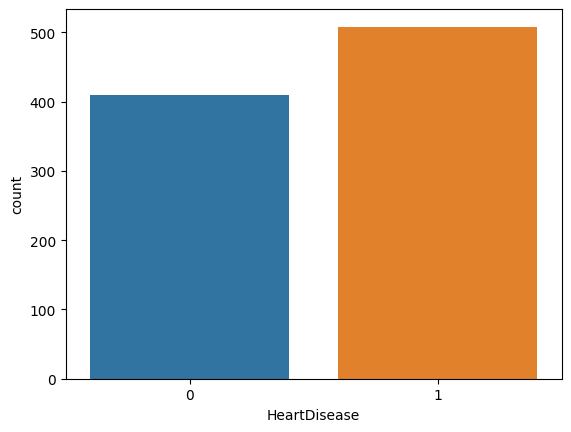

In [7]:
sns.countplot(data=df, x='HeartDisease')
print(df['HeartDisease'].value_counts())

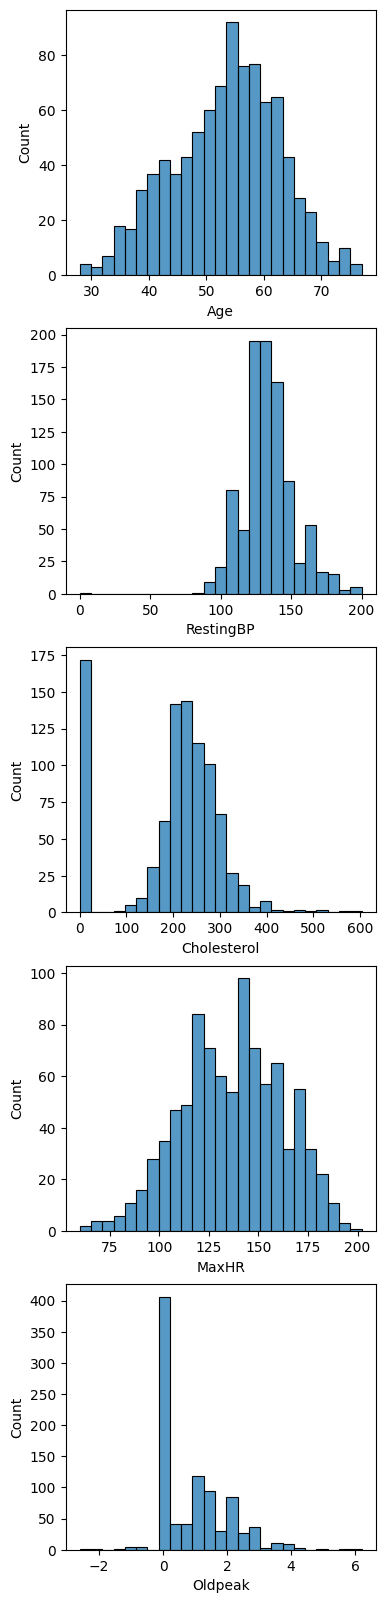

In [8]:
fig, ax = plt.subplots(nrows=5, figsize= (4,20))
for i, feature in enumerate(num_cols):
    sns.histplot(df[feature], bins=25, ax=ax[i])
plt.show()

C:\Users\JAIRO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\JAIRO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\JAIRO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\JAIRO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-

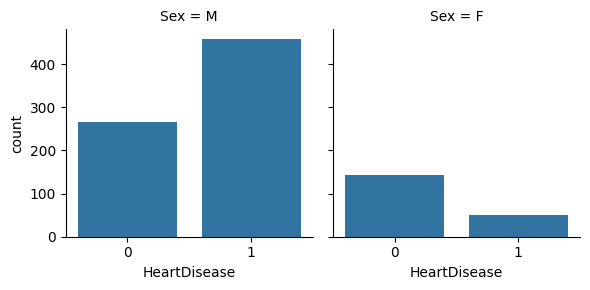

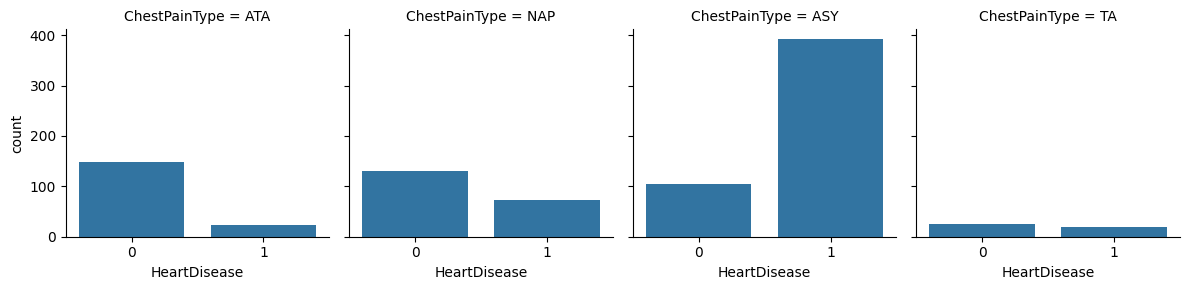

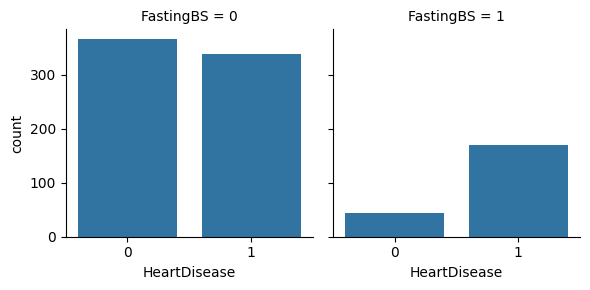

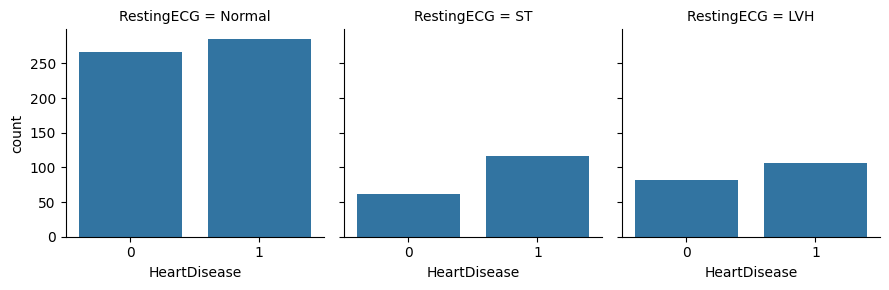

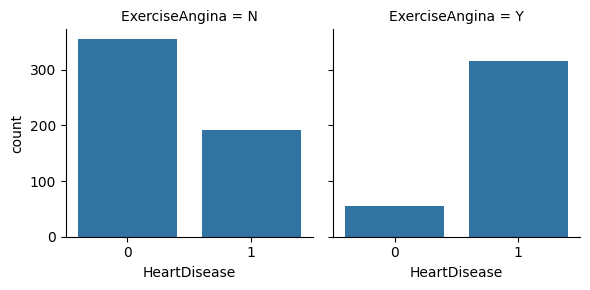

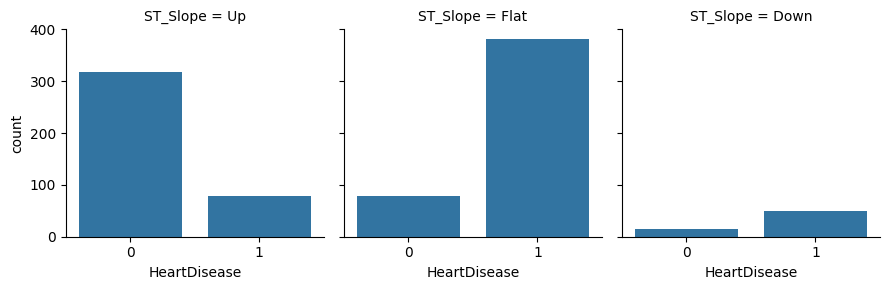

In [9]:
for i, feature in enumerate(cat_cols):
    g = sns.FacetGrid(data = df, col=feature)
    g.map(sns.countplot, 'HeartDisease')

In [10]:
df[['RestingBP', 'Cholesterol']] = df[['RestingBP', 'Cholesterol']].replace(0, np.nan)
df[['RestingBP', 'Cholesterol']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   RestingBP    917 non-null    float64
 1   Cholesterol  746 non-null    float64
dtypes: float64(2)
memory usage: 14.5 KB


In [11]:
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

In [12]:
X_cat = X[cat_cols]
X_num = X[num_cols]

C:\Users\JAIRO\AppData\Local\Temp\ipykernel_4856\1052870979.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(X.corr(), annot=True)


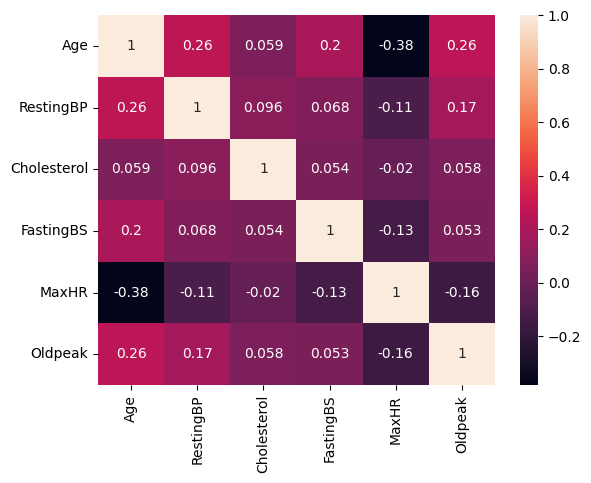

In [13]:
sns.heatmap(X.corr(), annot=True)
plt.show()

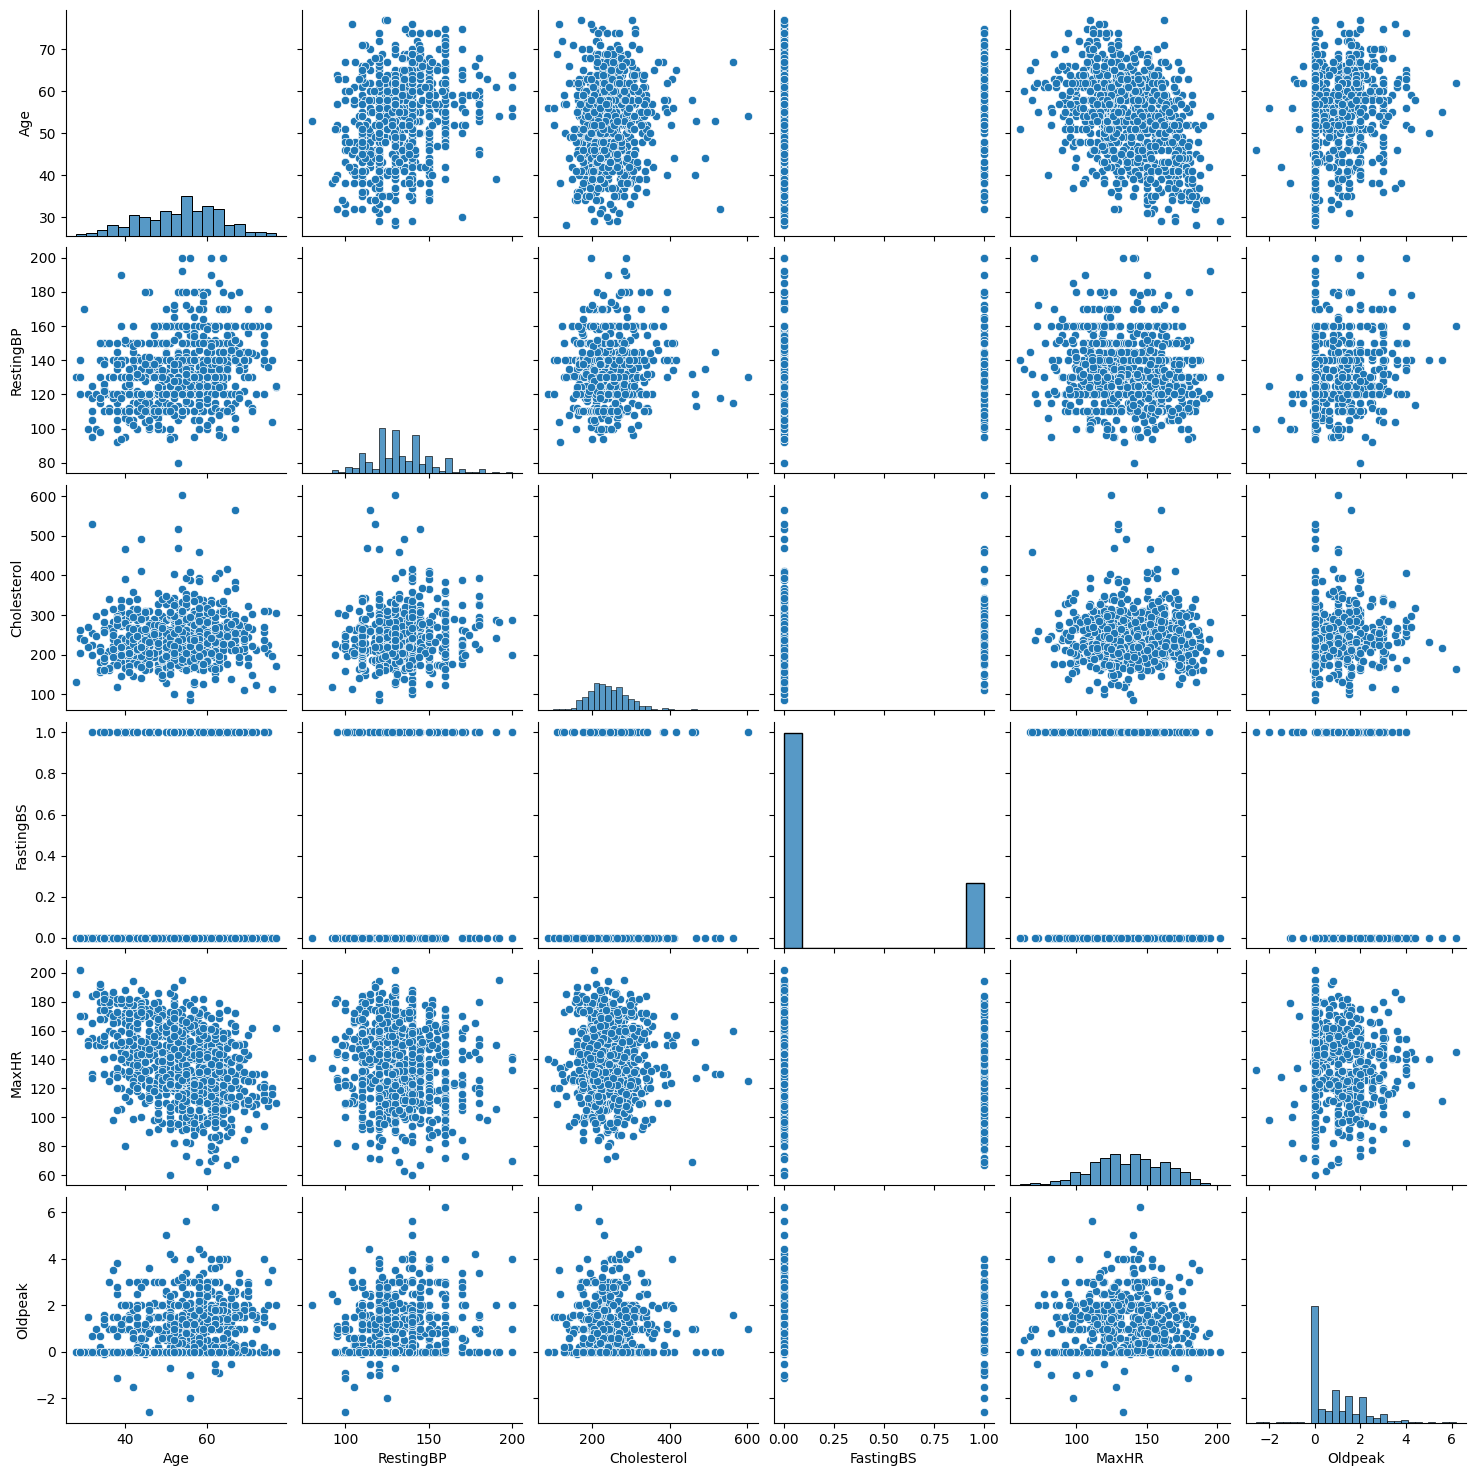

In [14]:
sns.pairplot(data=X)
plt.show()

In [15]:
from sklearn.impute import KNNImputer

imp_median = KNNImputer(missing_values=np.nan)
X_num_imputed = imp_median.fit_transform(X_num)
X_num_imputed = pd.DataFrame(X_num_imputed, columns=X_num.columns)
X_num_imputed.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
0,40.0,140.0,289.0,172.0,0.0
1,49.0,160.0,180.0,156.0,1.0
2,37.0,130.0,283.0,98.0,0.0
3,48.0,138.0,214.0,108.0,1.5
4,54.0,150.0,195.0,122.0,0.0


In [16]:
X_cat_dummies = pd.get_dummies(X_cat, drop_first=True)
X_cat_dummies.head()

,FastingBS,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,0,1,1,0,0,1,0,0,0,1
1,0,0,0,1,0,1,0,0,1,0
2,0,1,1,0,0,0,1,0,0,1
3,0,0,0,0,0,1,0,1,1,0
4,0,1,0,1,0,1,0,0,0,1


In [17]:
X_concat = pd.concat([X_num_imputed, X_cat_dummies], axis=1)
X_concat.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,FastingBS,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40.0,140.0,289.0,172.0,0.0,0,1,1,0,0,1,0,0,0,1
1,49.0,160.0,180.0,156.0,1.0,0,0,0,1,0,1,0,0,1,0
2,37.0,130.0,283.0,98.0,0.0,0,1,1,0,0,0,1,0,0,1
3,48.0,138.0,214.0,108.0,1.5,0,0,0,0,0,1,0,1,1,0
4,54.0,150.0,195.0,122.0,0.0,0,1,0,1,0,1,0,0,0,1


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_concat, y, test_size=0.2, stratify=y, random_state=19)
X_train.shape, X_test.shape

((734, 15), (184, 15))

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score
from sklearn.metrics import classification_report, make_scorer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

def apply_classifier(model, xTrain, yTrain, xTest, yTest):
    acc = make_scorer(accuracy_score)
    cv_results = cross_val_score(model, xTrain, yTrain, cv=6, scoring=acc)
    
    model.fit(xTrain, yTrain)
    predictions = model.predict(xTest)
    conf_mtx = confusion_matrix(yTest, predictions)

    fig, ax = plt.subplots()
    sns.heatmap(conf_mtx, annot=True, cbar= False, fmt="g") 
    ax.set_xlabel("Predictions") 
    ax.set_ylabel("Actual values") 
    ax.set_title("Matrix Confusion") 

    metric = [cv_results.mean(), cv_results.std(), accuracy_score(yTest, predictions)]
    print("Reporte de Clasificación : {}".format(classification_report(yTest, predictions)))
    return metric

In [20]:
from sklearn.model_selection import RandomizedSearchCV

def random_search(clf, parameters, xTrain, yTrain):
    grid_obj = RandomizedSearchCV(clf, parameters, scoring="roc_auc", cv=5)
    grid_fit = grid_obj.fit(xTrain, yTrain)
    best_clf = grid_fit.best_estimator_
    return best_clf

In [21]:
Tree_parameters = {"max_depth":[3,4,5,6], "min_samples_leaf": [1,2,3,4]}
LogReg_parameters = {"C": [0.25, 0.5, 0.75, 1.0, 1.5, 2.0, 2.5, 3.0, 4.0, 10.0],
                     "solver": ["newton-cg", "lbfgs", "sag", "saga"],
                     "tol": [0.01, 0.001, 0.0001, 0.00001]}
SVM_parameters = {"C": [1.0, 2.0, 3.0], "kernel":["sigmoid", "linear"], "tol": [0.01, 0.001, 0.0001, 0.00001]}    
RandomForest_parameters = {"n_estimators": [10, 15, 20, 25, 30], "criterion": ["entropy", "gini"],"max_depth":[3,4,5,6]}
Xgboost_parameters = {"max_depth":[3,4,5,6], "learning_rate":[0.001, 0.0001], "min_child_weight": [1,2,3,4]}

Reporte de Clasificación :               precision    recall  f1-score   support

           0       0.72      0.78      0.75        82
           1       0.81      0.75      0.78       102

    accuracy                           0.77       184
   macro avg       0.76      0.77      0.77       184
weighted avg       0.77      0.77      0.77       184



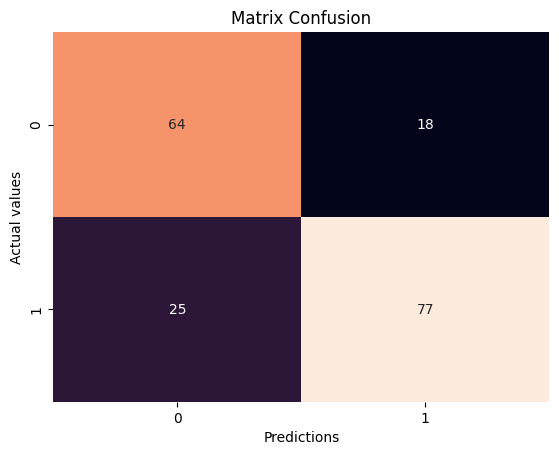

In [22]:
decision_tree = random_search(DecisionTreeClassifier(), Tree_parameters, X_train, y_train)
m_decision_tree = apply_classifier(decision_tree, X_train, y_train, X_test, y_test)

C:\Users\JAIRO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\JAIRO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\JAIRO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\JAIRO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_sag.py:350: Conve

Reporte de Clasificación :               precision    recall  f1-score   support

           0       0.83      0.76      0.79        82
           1       0.82      0.87      0.84       102

    accuracy                           0.82       184
   macro avg       0.82      0.81      0.82       184
weighted avg       0.82      0.82      0.82       184



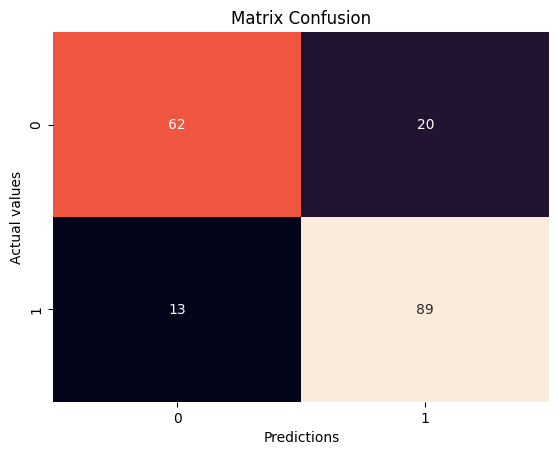

In [23]:
logistic_reg = random_search(LogisticRegression(), LogReg_parameters, X_train, y_train)
m_logistic_reg = apply_classifier(logistic_reg, X_train, y_train, X_test, y_test)

Reporte de Clasificación :               precision    recall  f1-score   support

           0       0.84      0.77      0.80        82
           1       0.83      0.88      0.85       102

    accuracy                           0.83       184
   macro avg       0.83      0.83      0.83       184
weighted avg       0.83      0.83      0.83       184



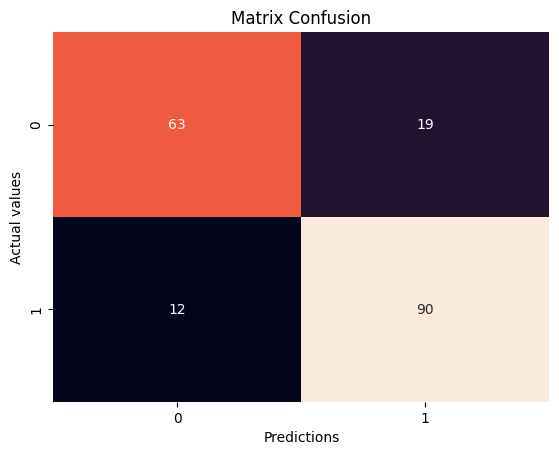

In [24]:
svm_model = random_search(SVC(), SVM_parameters, X_train, y_train)
m_svm_model = apply_classifier(svm_model,X_train, y_train, X_test, y_test)

Reporte de Clasificación :               precision    recall  f1-score   support

           0       0.76      0.74      0.75        82
           1       0.80      0.81      0.81       102

    accuracy                           0.78       184
   macro avg       0.78      0.78      0.78       184
weighted avg       0.78      0.78      0.78       184



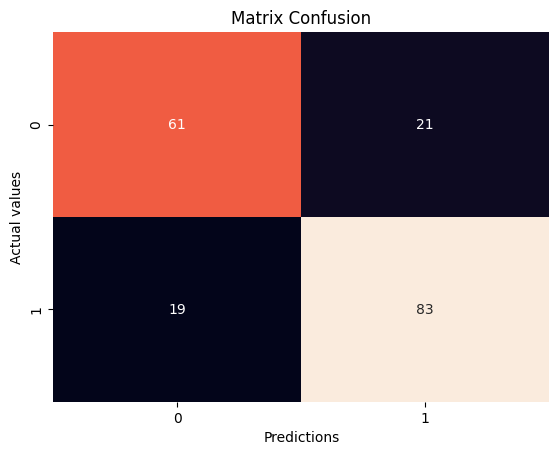

In [25]:
random_forest = random_search(RandomForestClassifier(), RandomForest_parameters, X_train, y_train)
m_random_forest = apply_classifier(random_forest, X_train, y_train, X_test, y_test)

Reporte de Clasificación :               precision    recall  f1-score   support

           0       0.72      0.78      0.75        82
           1       0.81      0.75      0.78       102

    accuracy                           0.77       184
   macro avg       0.76      0.77      0.77       184
weighted avg       0.77      0.77      0.77       184



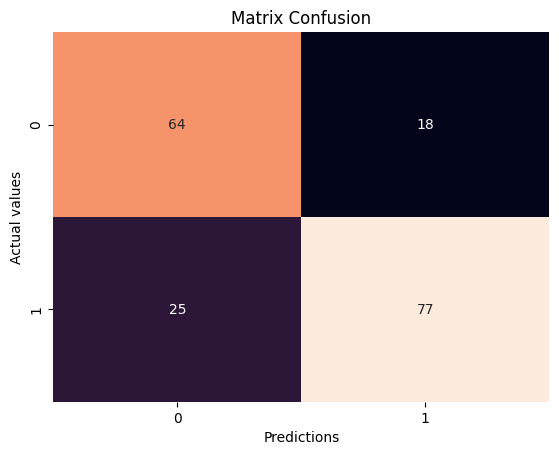

In [26]:
xg_boost = random_search(XGBClassifier(), Xgboost_parameters, X_train, y_train)
m_xg_boost = apply_classifier(xg_boost, X_train, y_train, X_test, y_test)

In [27]:
m_decision_tree
#m_logistic_reg
#m_svm_model
#m_random_forest
#m_xg_boost

[0.831100892976143, 0.023653284840209978, 0.7663043478260869]

In [38]:
results = pd.DataFrame([m_decision_tree, m_logistic_reg, m_svm_model, m_random_forest, m_xg_boost], columns=['Train_accuracy', 'Train_acc_std', 'Test_accuracy'])
results['models'] = ['decision_tree', 'logistic_reg', 'svm_model', 'random_forest', 'xg_boost']
results = results.set_index('models', drop=True)
results

,Train_accuracy,Train_acc_std,Test_accuracy
models,,,
decision_tree,0.831101,0.023653,0.766304
logistic_reg,0.866509,0.021345,0.820652
svm_model,0.866498,0.010015,0.831522
random_forest,0.852870,0.024020,0.782609
xg_boost,0.822971,0.035025,0.766304
